In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import json,urllib.request
import csv 
import pandas as pd
import requests
import geopandas as gpd
import geojson
import tweepy
import datetime
from fastai.text import *
import pydeck as pdk
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

C:\Softwares\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [78]:
covid_dat = pd.read_csv('coviddat1.csv')
covid_dat.describe()

,Unnamed: 0,trans_em,dom_em,tot_em,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop,total_registered_patients,hypertension,obesity_18,diabetes,asthma,coronary_heart_disease,all_bame_prop
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.00000,951.000000,951.000000
mean,476.000000,1.043304,1.048279,0.534952,5.030494,0.561978,9046.881178,0.086992,10174.479495,10.020852,5.726320,4.735636,4.18164,1.801546,0.393035
std,274.674353,0.315078,0.068106,0.155641,3.561507,0.386205,1926.286896,0.035260,2234.820761,2.049052,1.621238,1.335349,0.66057,0.520971,0.193107
min,1.000000,0.155535,0.821283,0.096301,0.000000,0.000000,5427.000000,0.016901,5887.000000,4.100000,1.730000,1.610000,1.80000,0.600000,0.038123
25%,238.500000,0.831016,1.010218,0.436978,3.000000,0.301773,7781.000000,0.060295,8639.000000,8.500000,4.610000,3.845000,3.78000,1.395000,0.235230
50%,476.000000,1.050103,1.047595,0.538909,4.000000,0.488878,8753.000000,0.079617,9841.000000,9.980000,5.600000,4.690000,4.19000,1.720000,0.372515
75%,713.500000,1.274036,1.086688,0.639458,7.000000,0.735479,9995.500000,0.106673,11311.000000,11.465000,6.740000,5.490000,4.60000,2.200000,0.534579
max,951.000000,2.016659,1.321558,1.001575,28.000000,2.827037,24969.000000,0.222585,24142.000000,15.980000,10.690000,10.650000,6.12000,3.310000,0.938644


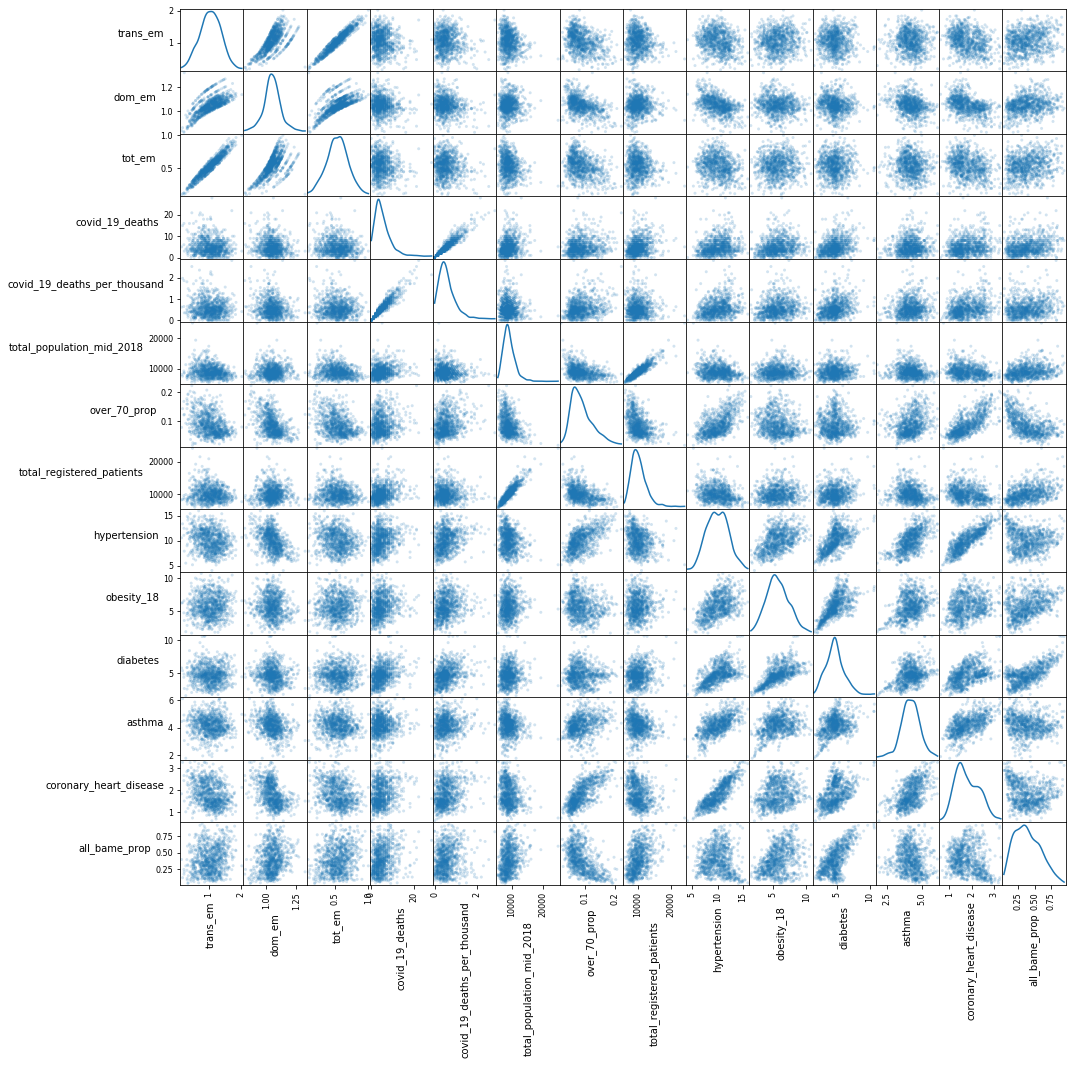

In [79]:
output = pd.plotting.scatter_matrix(covid_dat.drop(columns=['Unnamed: 0']), alpha=0.2, figsize=(15, 15),diagonal='kde')
for ax in output.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [80]:
# covid_dat[covid_dat.isna().any(axis=1)]
covid_dat[covid_dat.isin([np.nan, np.inf, -np.inf]).any(1)]
covid_dat

,Unnamed: 0,trans_em,dom_em,tot_em,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop,total_registered_patients,hypertension,obesity_18,diabetes,asthma,coronary_heart_disease,all_bame_prop
0,1,0.238920,1.321558,0.106799,3,0.344590,8706,0.123593,8584,7.95,3.62,2.70,3.08,1.50,0.213695
1,2,0.774236,0.961086,0.342107,2,0.259067,7720,0.103886,8315,9.26,6.15,4.99,3.91,1.88,0.350111
2,3,0.778130,0.961890,0.343828,3,0.271469,11051,0.085965,11873,10.33,7.60,5.79,4.64,1.83,0.453858
3,4,0.710810,0.947492,0.314081,9,1.366535,6586,0.124658,6852,9.34,8.36,4.95,3.58,1.93,0.190230
4,5,1.108912,1.020390,0.489988,5,0.488806,10229,0.066282,11150,9.37,8.79,5.15,4.26,1.47,0.337304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,947,0.503911,1.061664,0.216030,8,0.776021,10309,0.090503,10667,8.05,4.51,3.61,3.67,1.73,0.263705
947,948,0.994879,1.189113,0.426512,6,0.562641,10664,0.104745,10373,8.93,4.78,4.11,3.66,1.92,0.320590
948,949,1.126876,1.214062,0.483100,2,0.194005,10309,0.078087,10023,8.87,4.04,3.61,3.68,1.85,0.208653
949,950,0.792849,1.144968,0.339900,5,0.539084,9275,0.100054,9431,9.07,4.18,3.32,4.07,1.73,0.357160


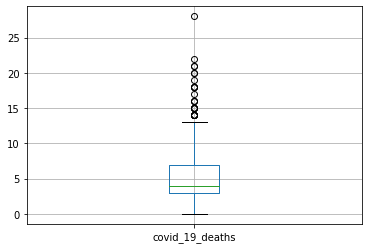

In [81]:
boxplot = covid_dat.boxplot(column=[ 'covid_19_deaths',])


#        'covid_19_deaths_per_thousand', 
# #         'total_population_mid_2018',
#        'over_70_prop', 
# #         'total_registered_patients', 
#         'hypertension',
#        'obesity_18', 'diabetes', 'asthma', 'coronary_heart_disease',
#        'all_bame_prop'])

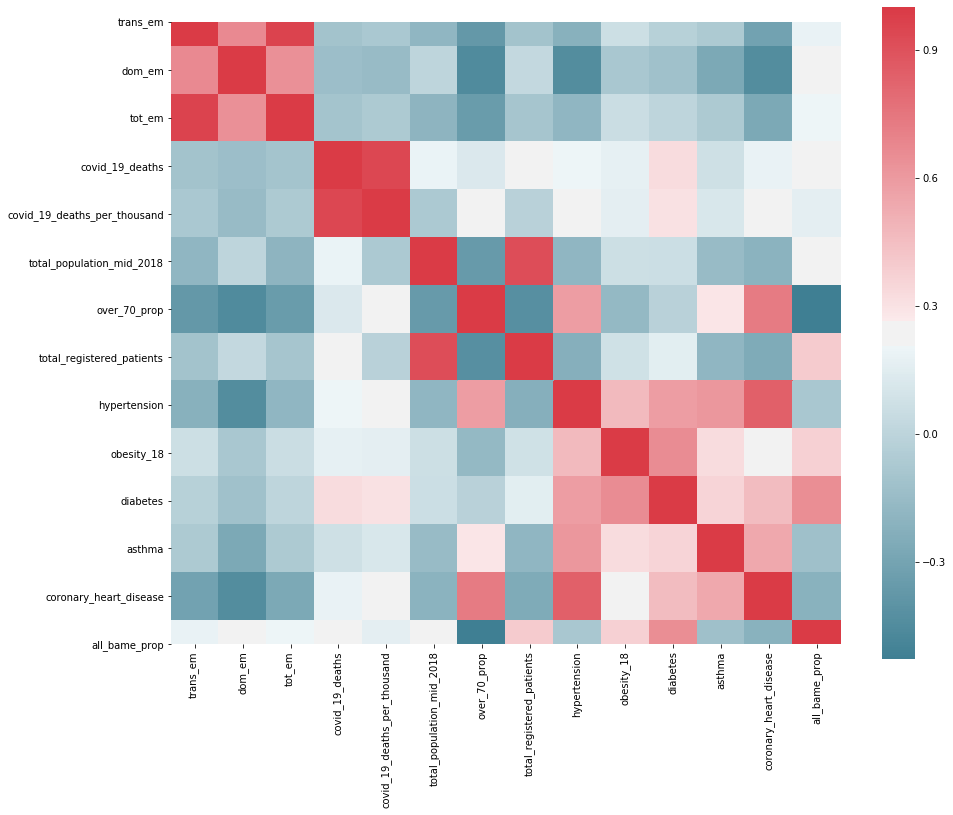

In [83]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 12))
corr = covid_dat.drop(columns=['Unnamed: 0']).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [84]:
# This code comes from the module of Quantitative Methods (CASA0007), and is prepared by Dr Thomas Evans

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
#             print(worst_feature)            
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(included[worst_feature], worst_pval))
            included.remove(included[worst_feature])
        if not changed:
            break
    return included

In [129]:
# calculating VIF
# This function is from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    

    
    print('Features above VIF threshold:\n')
#     print(vif_df[vif_df['VIF'] > thresh])
    print(vif_df)
    
    vif_df = vif_df[vif_df['VIF'] > thresh]
    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df

In [140]:
predictors_covid_dat = covid_dat[[ 'tot_em','hypertension','obesity_18', 'diabetes', 'asthma', 'coronary_heart_disease']]
response_covid_dat = covid_dat[['covid_19_deaths']]
# 'trans_em', 'dom_em',

In [141]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_covid_dat, y=response_covid_dat)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

C:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Add  diabetes                       with p-value 5.33558e-25
Add  tot_em                         with p-value 0.000762149
The predictors that are selected by stepwise regression are:
['diabetes', 'tot_em']


In [142]:
# df_predictors_select_VIF = calculate_vif_(covid_dat.drop(columns=['Unnamed: 0']))
df_predictors_select_VIF = calculate_vif_(predictors_covid_dat)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Features above VIF threshold:

                             VIF
hypertension            5.334164
coronary_heart_disease  4.380265
diabetes                2.215404
obesity_18              2.160617
asthma                  1.640948
tot_em                  1.114032
Dropping: hypertension
The columns remaining after VIF selection are:
Index(['tot_em', 'obesity_18', 'diabetes', 'asthma', 'coronary_heart_disease'], dtype='object')


In [200]:
predictors_covid_dat = covid_dat[['tot_em', 'obesity_18', 'diabetes', 'asthma', 'coronary_heart_disease','hypertension']]
response_covid_dat = covid_dat[['covid_19_deaths']]


In [162]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_covid_dat, y=response_covid_dat)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

C:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Add  diabetes                       with p-value 5.33558e-25
Add  tot_em                         with p-value 0.000762149
The predictors that are selected by stepwise regression are:
['diabetes', 'tot_em']


In [173]:
predictors_covid_dat = covid_dat[['tot_em', 'diabetes']]
response_covid_dat = covid_dat[['covid_19_deaths']]

In [201]:
# separate the independent and dependent variables

# predictors_covid_dat = covid_dat[['dom_em', 'over_70_prop', 'obesity_18', 'asthma', 'total_registered_patients','hypertension']]
# response_covid_dat = covid_dat[['covid_19_deaths']]

X = predictors_covid_dat.values
y = response_covid_dat.values

# the name list of independent variables
list_var_X = predictors_covid_dat.columns.tolist()
# list_var_X.remove('MEDV')

In [202]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_coordinates = pca.fit_transform(X)

In [203]:
print(print(list_var_X))

['tot_em', 'obesity_18', 'diabetes', 'asthma', 'coronary_heart_disease', 'hypertension']
None


In [204]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

,tot_em,obesity_18,diabetes,asthma,coronary_heart_disease,hypertension
0,-0.110202,0.364742,0.435603,0.412408,0.468846,0.524568
1,0.698683,0.502597,0.350556,-0.084468,-0.336382,-0.126730
2,0.649343,-0.429643,-0.312496,0.485493,0.213024,0.122569
3,0.262415,-0.327877,0.275918,-0.711706,0.437648,0.222359
4,-0.090073,-0.507812,0.713708,0.281074,-0.138676,-0.355529
5,0.032808,0.253751,-0.064776,0.039412,0.641003,-0.719653


In [205]:
print(pca.explained_variance_ratio_)

[0.514395 0.202398 0.131317 0.084697 0.048762 0.01843 ]


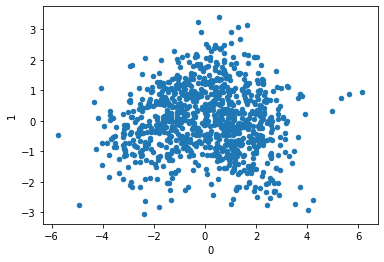

In [206]:
df_X_new_coord = pd.DataFrame(X_new_coordinates)
# print(df_X_new_coord.shape)
# print(df_X_new_coord.columns.tolist())
df_X_new_coord.plot.scatter(x = 0, y = 1)
# df_X_new_coord

In [208]:
list_predictor_select_stepwise = stepwise_selection(X=pd.DataFrame(X_new_coordinates), y=response_covid_dat)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

C:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Add                               0 with p-value 2.9433e-15
Add                               2 with p-value 2.92859e-07
Add                               4 with p-value 9.21323e-06
Add                               3 with p-value 0.000152243
The predictors that are selected by stepwise regression are:
[0, 2, 4, 3]


In [180]:
X = predictors_covid_dat.values
y = response_covid_dat.values

## Linear Regression

In [181]:
from sklearn.model_selection import train_test_split
split_rand_state = 1
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=split_rand_state)

In [182]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=train_X, y=train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
lr.score(X=test_X, y=test_y)

0.09935471322153377

In [184]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=response_covid_dat, exog=sm.add_constant(predictors_covid_dat)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        covid_19_deaths   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     62.78
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           2.48e-26
Time:                        14:36:05   Log-Likelihood:                -2497.7
No. Observations:                 951   AIC:                             5001.
Df Residuals:                     948   BIC:                             5016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1642      0.546      3.965      0.000       1.093       3.235
tot_em        -2.3586      0.698     -3.377      0.001      -3.729      -0.988
diabetes       0.8717      0.081     10.709      0.000       0.712       1.031
==============================================================================
Omnibus:                      287.411   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.468
Skew:                           1.448   Prob(JB):                    6.78e-212
Kurtosis:                       7.020   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## PCA

In [209]:
X_three_pc = X_new_coordinates[:,[0,2,4,3]]
split_rand_state = 1
train_X_pc, test_X_pc, train_y_pc, test_y_pc = train_test_split(X_three_pc, y, random_state=split_rand_state)

In [210]:
lr_pc = LinearRegression()
lr_pc.fit(X=train_X_pc, y=train_y_pc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
lr_pc.score(X=test_X_pc, y=test_y_pc)

0.09817404818560137

In [212]:
regressor_OLS = sm.OLS(endog=response_covid_dat, exog=sm.add_constant(X_three_pc)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        covid_19_deaths   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     32.67
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           1.54e-25
Time:                        21:08:06   Log-Likelihood:                -2495.3
No. Observations:                 951   AIC:                             5001.
Df Residuals:                     946   BIC:                             5025.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0305      0.108     46.371      0.000       4.818       5.243
x1             0.5109      0.062      8.273      0.000       0.390       0.632
x2            -0.6420      0.122     -5.253      0.000      -0.882      -0.402
x3             0.9007      0.201      4.491      0.000       0.507       1.294
x4             0.5787      0.152      3.803      0.000       0.280       0.877
==============================================================================
Omnibus:                      281.629   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.364
Skew:                           1.420   Prob(JB):                    8.59e-206
Kurtosis:                       6.970   Cond. No.                         3.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Classification method

In [146]:
covid_dat = pd.read_csv('coviddat1.csv')
covid_dat = covid_dat.drop(columns=['Unnamed: 0'])
covid_dat.describe()

,trans_em,dom_em,tot_em,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop,total_registered_patients,hypertension,obesity_18,diabetes,asthma,coronary_heart_disease,all_bame_prop
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.00000,951.000000,951.000000
mean,1.043304,1.048279,0.534952,5.030494,0.561978,9046.881178,0.086992,10174.479495,10.020852,5.726320,4.735636,4.18164,1.801546,0.393035
std,0.315078,0.068106,0.155641,3.561507,0.386205,1926.286896,0.035260,2234.820761,2.049052,1.621238,1.335349,0.66057,0.520971,0.193107
min,0.155535,0.821283,0.096301,0.000000,0.000000,5427.000000,0.016901,5887.000000,4.100000,1.730000,1.610000,1.80000,0.600000,0.038123
25%,0.831016,1.010218,0.436978,3.000000,0.301773,7781.000000,0.060295,8639.000000,8.500000,4.610000,3.845000,3.78000,1.395000,0.235230
50%,1.050103,1.047595,0.538909,4.000000,0.488878,8753.000000,0.079617,9841.000000,9.980000,5.600000,4.690000,4.19000,1.720000,0.372515
75%,1.274036,1.086688,0.639458,7.000000,0.735479,9995.500000,0.106673,11311.000000,11.465000,6.740000,5.490000,4.60000,2.200000,0.534579
max,2.016659,1.321558,1.001575,28.000000,2.827037,24969.000000,0.222585,24142.000000,15.980000,10.690000,10.650000,6.12000,3.310000,0.938644


In [147]:
covid19_deaths_mean = covid_dat['covid_19_deaths'].mean()
covid19_deaths_mean
covid_dat['risk'] = str("High")

# covid_dat = covid_dat[covid_dat['covid_19_deaths'] <= covid19_deaths_mean ].replace('High','Low')
# = "Low"
# = "High"

In [148]:
covid_dat.loc[covid_dat['covid_19_deaths'] <= covid19_deaths_mean,'risk' ]= 'Low'

In [149]:
covid_dat['risk'].value_counts()

Low     611
High    340
Name: risk, dtype: int64

In [150]:
covid_dat[['covid_19_deaths','risk']].head()

,covid_19_deaths,risk
0,3,Low
1,2,Low
2,3,Low
3,9,High
4,5,Low


In [151]:
# X and y dataset
data = covid_dat.drop('risk', axis=1)
y = covid_dat['risk']

######
# data = covid_dat.drop(['covid_19_deaths','covid_19_deaths_per_thousand','total_population_mid_2018'], axis=1)
# y = covid_dat['covid_19_deaths']

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # creates the LabelEncoder object
le.fit(y.unique()) # this gives you control on the order. Here, '<=50K' and '>50K' would be encoded as 0 and 1 respectively.
labels_fea = le.transform(y) # runs LabelEncoder on the over50k column

In [153]:
pd.Series(labels_fea).value_counts()

1    611
0    340
dtype: int64

In [154]:
from sklearn.feature_extraction import DictVectorizer

In [155]:
covid_dict = data.to_dict('record')
print(covid_dict[1])

{'trans_em': 0.774236494266749, 'dom_em': 0.9610861105010079, 'tot_em': 0.34210711286332, 'covid_19_deaths': 2, 'covid_19_deaths_per_thousand': 0.259067357512953, 'total_population_mid_2018': 7720, 'over_70_prop': 0.103886010362694, 'total_registered_patients': 8315, 'hypertension': 9.26, 'obesity_18': 6.15, 'diabetes': 4.99, 'asthma': 3.91, 'coronary_heart_disease': 1.88, 'all_bame_prop': 0.350110701107011}


In [156]:
vec = DictVectorizer()  # create the DictVectorizer object
data_mat = vec.fit_transform(covid_dict)  # execute process on the record dictionaries

In [157]:
type(data_mat) #test code
# print(vec.feature_names_)
print(data_mat)

  (0, 0)	0.21369491525423698
  (0, 1)	3.08
  (0, 2)	1.5
  (0, 3)	3.0
  (0, 4)	0.34458993797381104
  (0, 5)	2.7
  (0, 6)	1.32155788759125
  (0, 7)	7.95
  (0, 8)	3.62
  (0, 9)	0.12359292441994
  (0, 10)	0.106798538310493
  (0, 11)	8706.0
  (0, 12)	8584.0
  (0, 13)	0.23892006916816197
  (1, 0)	0.350110701107011
  (1, 1)	3.91
  (1, 2)	1.88
  (1, 3)	2.0
  (1, 4)	0.259067357512953
  (1, 5)	4.99
  (1, 6)	0.9610861105010079
  (1, 7)	9.26
  (1, 8)	6.15
  (1, 9)	0.103886010362694
  (1, 10)	0.34210711286332
  :	:
  (949, 3)	5.0
  (949, 4)	0.5390835579514821
  (949, 5)	3.32
  (949, 6)	1.1449676229610501
  (949, 7)	9.07
  (949, 8)	4.18
  (949, 9)	0.100053908355795
  (949, 10)	0.339899949735731
  (949, 11)	9275.0
  (949, 12)	9431.0
  (949, 13)	0.7928490205878979
  (950, 0)	0.29748636471425105
  (950, 1)	3.65
  (950, 2)	1.85
  (950, 3)	5.0
  (950, 4)	0.5099959200326389
  (950, 5)	3.61
  (950, 6)	1.20948866006214
  (950, 7)	8.91
  (950, 8)	3.88
  (950, 9)	0.109547123623011
  (950, 10)	0.47228338733944

In [158]:
# inspect the variable names. 108 variables in total
# to view the first five names
print(vec.feature_names_)
# and the mapping of variable names to indices
print(vec.vocabulary_)

['all_bame_prop', 'asthma', 'coronary_heart_disease', 'covid_19_deaths', 'covid_19_deaths_per_thousand', 'diabetes', 'dom_em', 'hypertension', 'obesity_18', 'over_70_prop', 'tot_em', 'total_population_mid_2018', 'total_registered_patients', 'trans_em']
{'trans_em': 13, 'dom_em': 6, 'tot_em': 10, 'covid_19_deaths': 3, 'covid_19_deaths_per_thousand': 4, 'total_population_mid_2018': 11, 'over_70_prop': 9, 'total_registered_patients': 12, 'hypertension': 7, 'obesity_18': 8, 'diabetes': 5, 'asthma': 1, 'coronary_heart_disease': 2, 'all_bame_prop': 0}


In [159]:
print(data_mat.shape)
print(type(data_mat))

(951, 14)
<class 'scipy.sparse.csr.csr_matrix'>


In [160]:
data_array = data_mat.toarray() 
print(data_array.shape)
print(type(data_array))

(951, 14)
<class 'numpy.ndarray'>


In [161]:
from sklearn.model_selection import train_test_split
train_d, test_d, train_lab, test_lab = train_test_split(data_array, labels_fea)

In [162]:
print(train_d.shape)
print(test_d.shape)

(713, 14)
(238, 14)


In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
# add timing script
import time
start_time = time.time()
clf_knn = KNeighborsClassifier(n_neighbors=50)  # creates the kNN classifier, setting it to check the 60 neighbouring points
clf_knn.fit(train_d, train_lab)  # executes the classifier on the training dataset
end_time = time.time()
# print the time difference in seconds
print(end_time - start_time)

0.0029993057250976562


In [165]:
clf_knn.score(test_d, test_lab)

0.6302521008403361

In [166]:
clf_knn.predict(test_d)

array([0, 0, 1, 0, ..., 1, 0, 1, 1])

In [167]:
test_pred_knn = clf_knn.predict(test_d)

In [168]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_knn)

<Figure size 1440x1440 with 0 Axes>

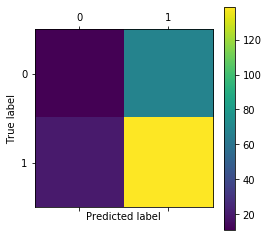

In [169]:
plt.figure(figsize=(20,20))
plt.matshow(confusion_matrix)
# plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [119]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(slf_4, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)

### Confusision matrix multilabel 

In [120]:
!pip install scikit-learn

In [121]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with

class_names = data.columns.values.tolist()

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data_array, labels_fea)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [122]:
print (metrics.classification_report(test_lab, test_pred_knn))

              precision    recall  f1-score   support

           0       0.59      0.20      0.30        96
           1       0.63      0.91      0.74       142

    accuracy                           0.62       238
   macro avg       0.61      0.55      0.52       238
weighted avg       0.61      0.62      0.56       238



In [123]:
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation

tuned_parameters = [{'n_neighbors': [10, 20, 50, 100, 200, 450]}]


scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for :  %s" % score)
    print()

    clf = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(train_d, train_lab)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

# Tuning hyper-parameters for :  precision



C:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

C:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Softwares\Anaconda\lib\site-pack

Best parameters set found on development set:

{'n_neighbors': 100}

Grid scores on development set:

0.555 (+/-0.042) for {'n_neighbors': 10}
0.556 (+/-0.023) for {'n_neighbors': 20}
0.590 (+/-0.072) for {'n_neighbors': 50}
0.601 (+/-0.084) for {'n_neighbors': 100}
0.329 (+/-0.001) for {'n_neighbors': 200}
0.329 (+/-0.001) for {'n_neighbors': 450}
# Tuning hyper-parameters for :  recall



C:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



Best parameters set found on development set:

{'n_neighbors': 50}

Grid scores on development set:

0.544 (+/-0.022) for {'n_neighbors': 10}
0.535 (+/-0.013) for {'n_neighbors': 20}
0.544 (+/-0.032) for {'n_neighbors': 50}
0.535 (+/-0.009) for {'n_neighbors': 100}
0.500 (+/-0.000) for {'n_neighbors': 200}
0.500 (+/-0.000) for {'n_neighbors': 450}


In [124]:
from sklearn.linear_model import LogisticRegression
# we set random_state as 0 to make the result reproducible
# we set max_iter as 10^7 in order to guarantee convergence

clf_logit_reg = LogisticRegression(random_state=0, max_iter=10e7).fit(train_d, train_lab)

C:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [125]:
test_pred_logit_reg = clf_logit_reg.predict(test_d)
print (metrics.classification_report(test_lab, test_pred_logit_reg))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        96
           1       0.98      0.99      0.98       142

    accuracy                           0.98       238
   macro avg       0.98      0.98      0.98       238
weighted avg       0.98      0.98      0.98       238



## Decision Tree 

In [177]:
covid_dat = pd.read_csv('coviddat1.csv')
covid_dat = covid_dat.drop(columns=['Unnamed: 0'])
data = covid_dat.drop(['covid_19_deaths','covid_19_deaths_per_thousand','total_population_mid_2018'], axis=1)
y = covid_dat['covid_19_deaths']
le = LabelEncoder() # creates the LabelEncoder object
le.fit(y.unique()) # this gives you control on the order. Here, '<=50K' and '>50K' would be encoded as 0 and 1 respectively.
labels_fea = le.transform(y) # runs LabelEncoder on the over50k column
covid_dict = data.to_dict('record')
vec = DictVectorizer()  # create the DictVectorizer object
data_mat = vec.fit_transform(covid_dict)  # execute process on the record dictionaries
data_array = data_mat.toarray() 
train_d, test_d, train_lab, test_lab = train_test_split(data_array, labels_fea)

In [178]:
from sklearn.tree import DecisionTreeClassifier
clf_decision_tree = DecisionTreeClassifier()  # creates the kNN classifier, setting it to check the 60 neighbouring points
clf_decision_tree.fit(train_d, train_lab)
test_pred_decision_tree = clf_decision_tree.predict(test_d)

In [179]:
print (metrics.classification_report(test_lab, test_pred_decision_tree))

C:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.03      0.04      0.04        24
           2       0.20      0.12      0.15        25
           3       0.24      0.24      0.24        42
           4       0.20      0.26      0.23        34
           5       0.04      0.03      0.04        30
           6       0.05      0.04      0.05        23
           7       0.15      0.20      0.17        10
           8       0.18      0.17      0.17        12
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00    

<Figure size 1440x1440 with 0 Axes>

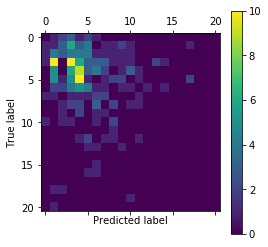

In [180]:
test_pred_knn = clf_decision_tree.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_knn)
plt.figure(figsize=(20,20))
plt.matshow(confusion_matrix)
# plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

1.673232078552246


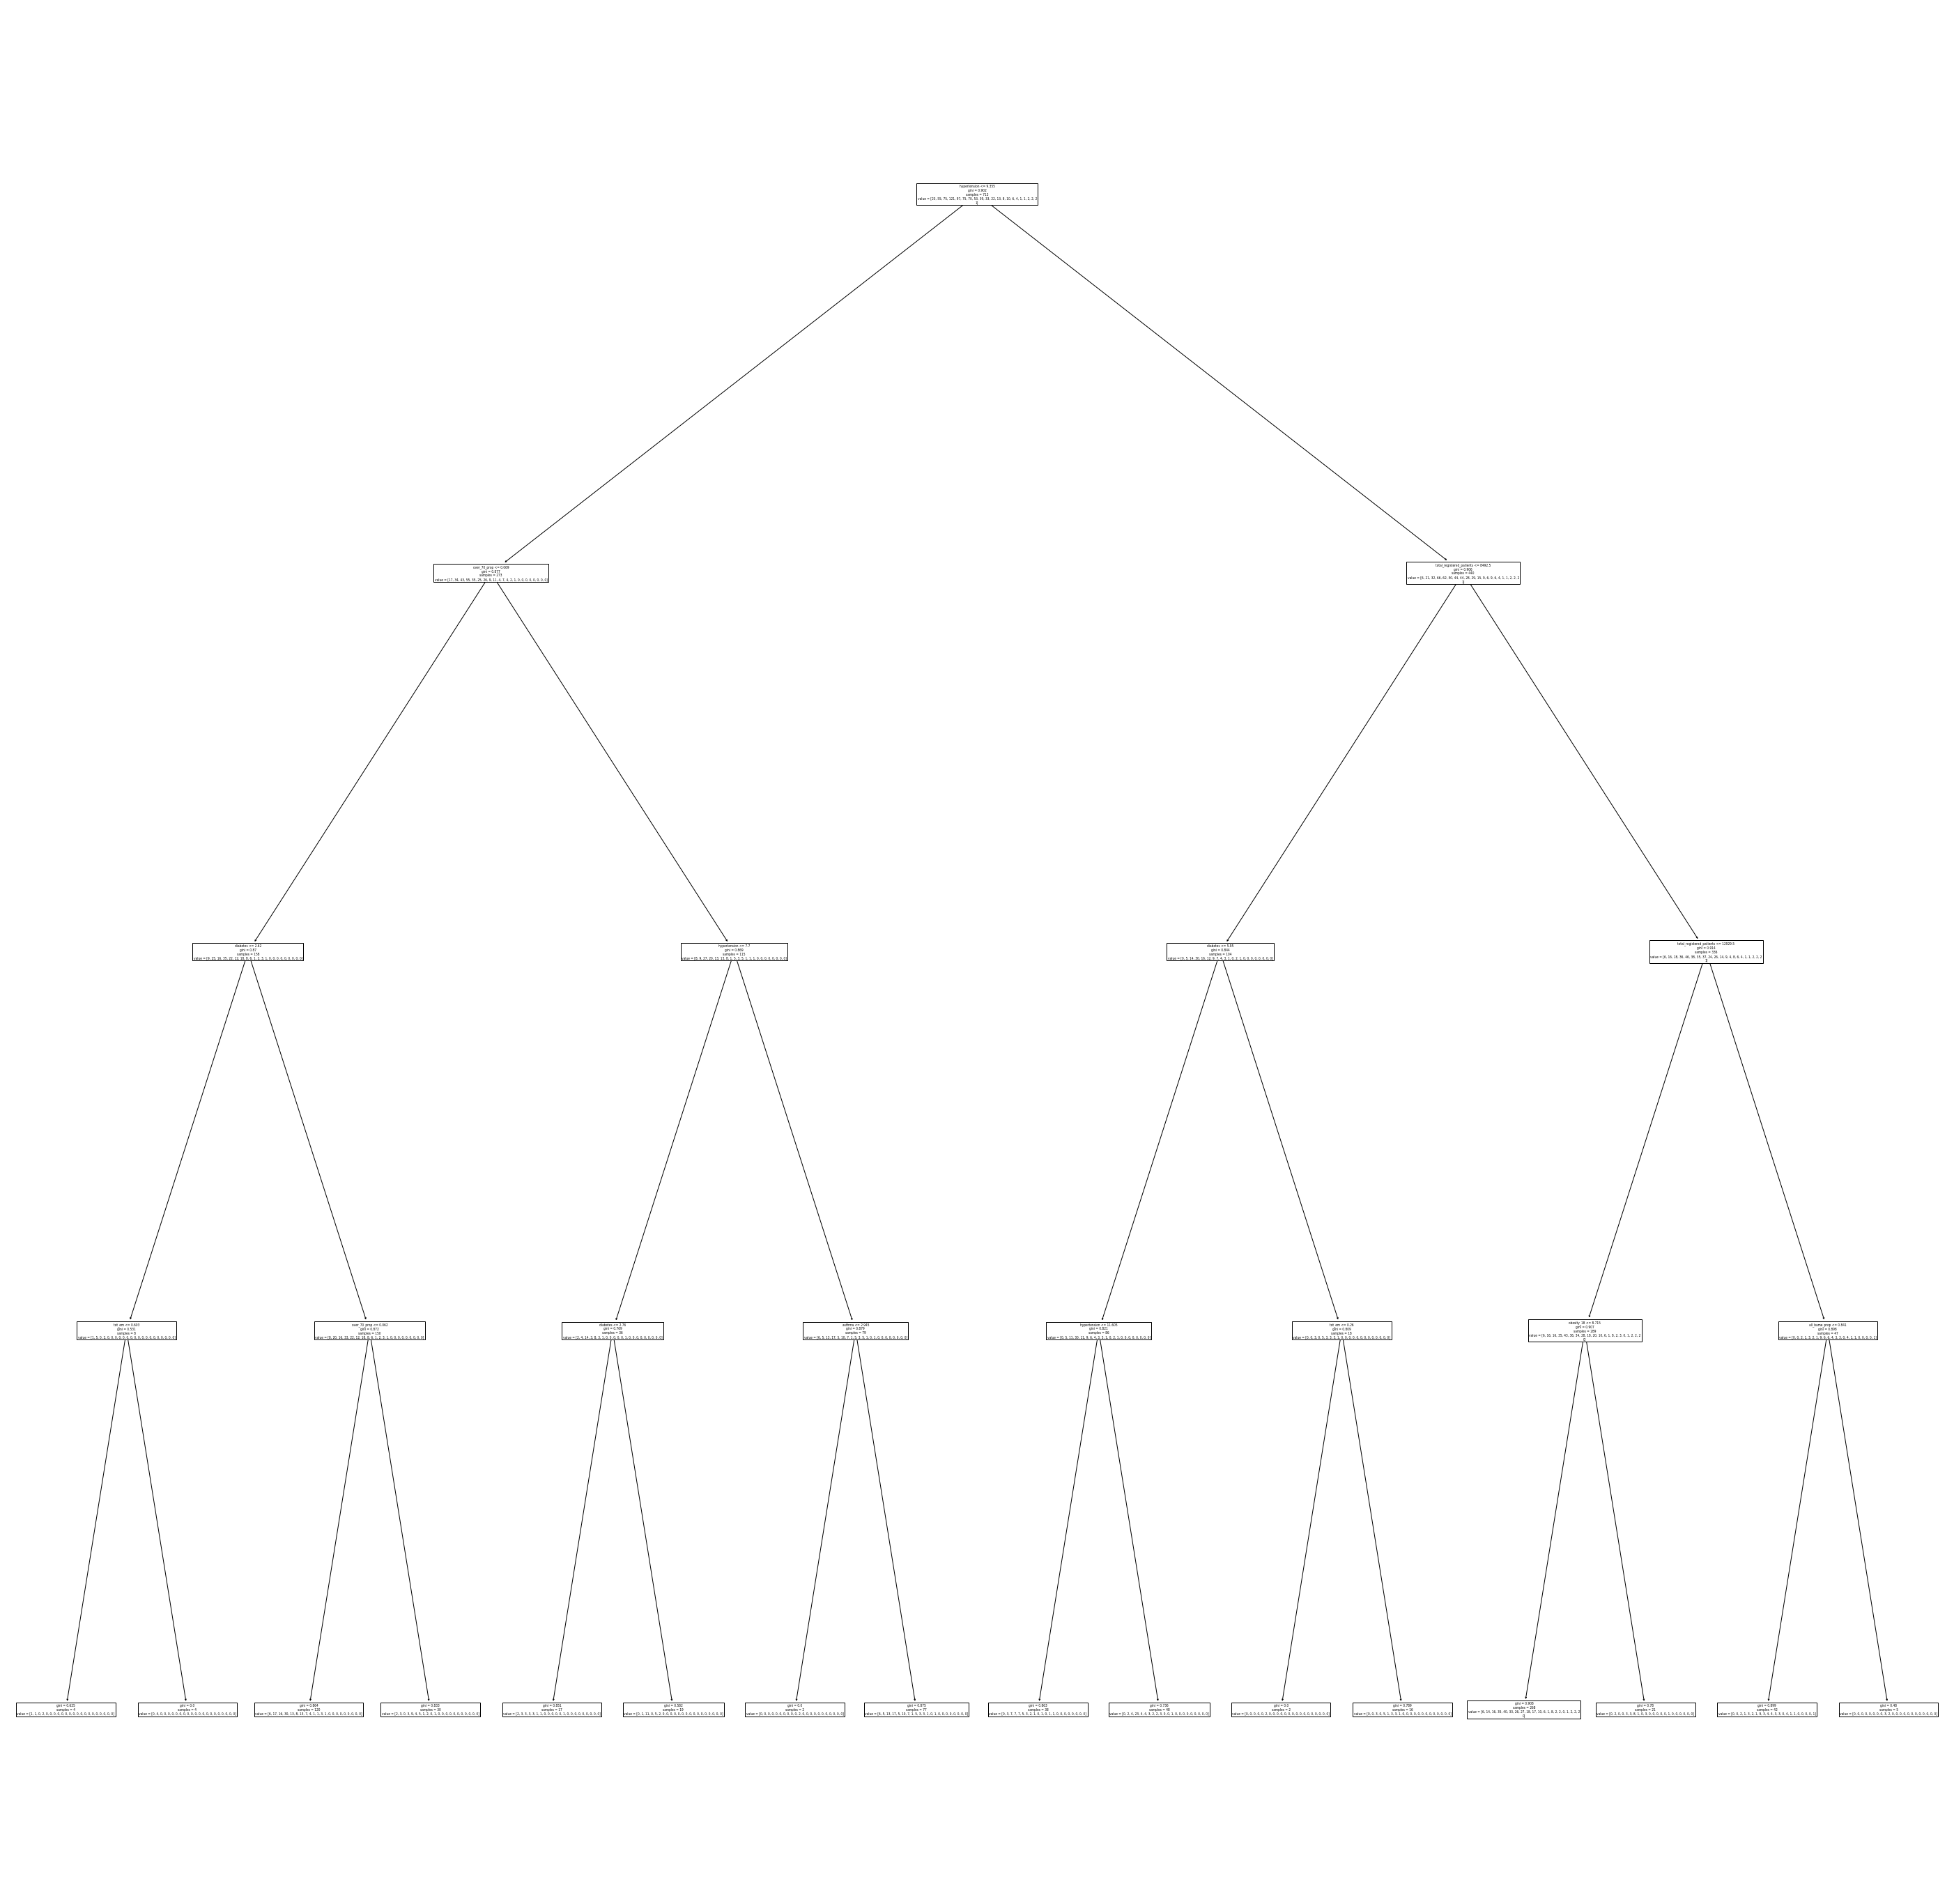

In [181]:
    # the code is based on this link: https://stackoverflow.com/a/59517013/4667568
    decision_tree_depth_5 = DecisionTreeClassifier(max_depth=4)
    decision_tree_depth_5.fit(train_d, train_lab)

    plt.figure(figsize=(50,50))  # customize according to the size of your tree. If you can't see the tree clearly, you may change the size

    from sklearn import tree
    start_time = time.time()

    # vec.feature_names_ represents the variable names
    _ =  tree.plot_tree(decision_tree_depth_5 , feature_names = vec.feature_names_)
    # if you want to save the picture to a file, add this line before plt.show()
#     plt.savefig('decision_tree.png')

#     plt.show()

    end_time = time.time()
    print(end_time - start_time)

In [182]:
# the code is based on this link: https://stackoverflow.com/a/57335067/4667568
from sklearn.tree import export_text
tree_rules = export_text(decision_tree_depth_5, feature_names=vec.feature_names_)
print(tree_rules)

|--- hypertension <= 9.36
|   |--- over_70_prop <= 0.07
|   |   |--- diabetes <= 2.62
|   |   |   |--- tot_em <= 0.60
|   |   |   |   |--- class: 3
|   |   |   |--- tot_em >  0.60
|   |   |   |   |--- class: 1
|   |   |--- diabetes >  2.62
|   |   |   |--- over_70_prop <= 0.06
|   |   |   |   |--- class: 3
|   |   |   |--- over_70_prop >  0.06
|   |   |   |   |--- class: 4
|   |--- over_70_prop >  0.07
|   |   |--- hypertension <= 7.70
|   |   |   |--- diabetes <= 2.76
|   |   |   |   |--- class: 1
|   |   |   |--- diabetes >  2.76
|   |   |   |   |--- class: 2
|   |   |--- hypertension >  7.70
|   |   |   |--- asthma <= 2.95
|   |   |   |   |--- class: 10
|   |   |   |--- asthma >  2.95
|   |   |   |   |--- class: 3
|--- hypertension >  9.36
|   |--- total_registered_patients <= 8492.50
|   |   |--- diabetes <= 5.95
|   |   |   |--- hypertension <= 11.61
|   |   |   |   |--- class: 2
|   |   |   |--- hypertension >  11.61
|   |   |   |   |--- class: 3
|   |   |--- diabetes >  5.95
|  

In [53]:
# !pip install graphviz 
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:\\Softwares\\Anaconda\\Lib\\site-packages\\graphviz\\'
os.environ["PATH"]

'C:\\Softwares\\Anaconda\\lib\\site-packages\\torch\\lib;C:\\Softwares\\Anaconda\\Library\\bin;;C:\\Softwares\\Anaconda\\lib\\site-packages\\shapely\\DLLs;C:\\Softwares\\Anaconda\\DLLs;C:\\Softwares\\Anaconda;C:\\Softwares\\Anaconda\\Library\\mingw-w64\\bin;C:\\Softwares\\Anaconda\\Library\\usr\\bin;C:\\Softwares\\Anaconda\\Library\\bin;C:\\Softwares\\Anaconda\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Softwares\\Git\\cmd;C:\\Softwares\\Putty\\;C:\\Softwares\\Anaconda\\Lib\\site-packages\\graphviz\\;C:\\Users\\arunk\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Softwares\\Microsoft VS Code\\bin;C:\\Users\\arunk\\AppData\\Local\\GitHubDesktop\\bin;C:\\Softwares\\Java\\jdk-13.0.1_windows-x64_bin\\jdk-13.0.1\\bin;C:\\Softwares\\Docker Toolbox;C:\\ProgramData\\chocoportable\\bin;C:\\Softwares\\Java\\jre1.8.0_251;C:\\So

In [54]:
# dot_data = tree.export_graphviz(decision_tree_depth_5, out_file=None)
# graph = graphviz.Source(dot_data)
# graph

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [90]:
# X, y = make_classification(n_samples=1000, n_features=4,
#                             n_informative=2, n_redundant=0,
#                             random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=0,max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [91]:
clf.fit(train_d, train_lab)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

In [92]:
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=1,
                       warm_start=False)


In [93]:
n_nodes = []
max_depths = []

for ind_tree in clf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 295
Average maximum depth 10


In [94]:
train_rf_predictions = clf.predict(train_d)
train_rf_probs = clf.predict_proba(train_d)[:, 1]

rf_predictions = clf.predict(test_d)
rf_probs = clf.predict_proba(test_d)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [61]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    #train_d, test_d, train_lab, test_lab
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_lab, [1 for _ in range(len(test_lab))])
    baseline['precision'] = precision_score(test_lab, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_lab, predictions)
    results['precision'] = precision_score(test_lab, predictions)
    results['roc'] = roc_auc_score(test_lab, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_lab, train_predictions)
    train_results['precision'] = precision_score(train_lab, train_predictions)
    train_results['roc'] = roc_auc_score(train_lab, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_lab, [1 for _ in range(len(test_lab))])
    model_fpr, model_tpr, _ = roc_curve(test_lab, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [62]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

NameError: name 'test_labels' is not defined

In [63]:
cm = confusion_matrix(pd.dataFrame(test_lab), rf_predictions)
plot_confusion_matrix(cm, classes = ['TotEm', 'test_lab','diabetes','asthma','Obesity','Hypertension'],
                      title = 'covid_19_deaths')

AttributeError: module 'pandas' has no attribute 'dataFrame'

In [64]:


estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=train.columns, max_depth = 8, 
                class_names = ['poverty', 'no poverty'], filled = True)



NameError: name 'best_model' is not defined

In [65]:
X =  data_mat.toarray()
y = covid_dat['covid_19_deaths']
covid_dat.head()

,trans_em,dom_em,tot_em,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop,total_registered_patients,hypertension,obesity_18,diabetes,asthma,coronary_heart_disease,all_bame_prop,risk
0,0.238920,1.321558,0.106799,3,0.344590,8706,0.123593,8584,7.95,3.62,2.70,3.08,1.50,0.213695,Low
1,0.774236,0.961086,0.342107,2,0.259067,7720,0.103886,8315,9.26,6.15,4.99,3.91,1.88,0.350111,Low
2,0.778130,0.961890,0.343828,3,0.271469,11051,0.085965,11873,10.33,7.60,5.79,4.64,1.83,0.453858,Low
3,0.710810,0.947492,0.314081,9,1.366535,6586,0.124658,6852,9.34,8.36,4.95,3.58,1.93,0.190230,High
4,1.108912,1.020390,0.489988,5,0.488806,10229,0.066282,11150,9.37,8.79,5.15,4.26,1.47,0.337304,Low


In [66]:
X

array([[2.136949e-01, 3.080000e+00, 1.500000e+00, 3.000000e+00, ..., 1.067985e-01, 8.706000e+03, 8.584000e+03,
        2.389201e-01],
       [3.501107e-01, 3.910000e+00, 1.880000e+00, 2.000000e+00, ..., 3.421071e-01, 7.720000e+03, 8.315000e+03,
        7.742365e-01],
       [4.538576e-01, 4.640000e+00, 1.830000e+00, 3.000000e+00, ..., 3.438275e-01, 1.105100e+04, 1.187300e+04,
        7.781300e-01],
       [1.902297e-01, 3.580000e+00, 1.930000e+00, 9.000000e+00, ..., 3.140814e-01, 6.586000e+03, 6.852000e+03,
        7.108103e-01],
       ...,
       [3.205896e-01, 3.660000e+00, 1.920000e+00, 6.000000e+00, ..., 4.265117e-01, 1.066400e+04, 1.037300e+04,
        9.948792e-01],
       [2.086531e-01, 3.680000e+00, 1.850000e+00, 2.000000e+00, ..., 4.830999e-01, 1.030900e+04, 1.002300e+04,
        1.126876e+00],
       [3.571602e-01, 4.070000e+00, 1.730000e+00, 5.000000e+00, ..., 3.398999e-01, 9.275000e+03, 9.431000e+03,
        7.928490e-01],
       [2.974864e-01, 3.650000e+00, 1.850000e+00, 

In [67]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data


plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for pair in ([0, 6], [0, 8], [0, 9],[0, 10],[0, 11],[0, 12]):
    for model in models:
        # We only take the two corresponding features
        X = covid_dat[:, pair]
        y = covid_dat.covid_19_deaths

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

Automatically created module for IPython interactive environment


TypeError: '(slice(None, None, None), [0, 6])' is an invalid key